<a href="https://colab.research.google.com/github/sanjeesi/Data-Science/blob/master/Data%20Science%20IITM/TDS/TDS_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [189]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [190]:
r = requests.get('https://www.senate.gov/legislative/LIS/roll_call_votes/vote1171/vote_117_1_00269.htm')

In [191]:
soup = BeautifulSoup(r.content, 'html5lib')

In [192]:
div = soup.find('div', attrs={'class':'newspaperDisplay_3column'})
span = div.find('span').get_text()
senator = []
vote = []
party = []
region = []
for row in span.split('\n')[:-2]:
  senator.append(row.split(',')[0].split('(')[0].strip())
  party.append(row.split(',')[0].split('(')[1].split('-')[0])
  region.append(row.split(',')[0].split('(')[1].split('-')[1].strip(')'))
  
  vote.append(row.split(',')[1].strip())

data = {}
data['senator'] = senator
data['party'] = party
data['region'] = region
data['vote'] = vote

df = pd.DataFrame(data)

df.shape

(100, 4)

In [193]:
df

,senator,party,region,vote
0,Baldwin,D,WI,Yea
1,Barrasso,R,WY,Nay
2,Bennet,D,CO,Yea
3,Blackburn,R,TN,Nay
4,Blumenthal,D,CT,Yea
...,...,...,...,...
95,Warren,D,MA,Yea
96,Whitehouse,D,RI,Yea
97,Wicker,R,MS,Nay
98,Wyden,D,OR,Yea


In [194]:
df['vote'].unique()

array(['Yea', 'Nay'], dtype=object)

In [195]:
df.groupby(['party', 'vote']).count()

,,senator,region
party,vote,,
D,Yea,48,48
I,Yea,2,2
R,Nay,50,50


In [196]:
len(df[df['party'] == 'R'])

50

In [197]:
df['party'].unique()

array(['D', 'R', 'I'], dtype=object)

1. How many democrats did not vote?

In [198]:
len(df[(df['party'] == 'D') & (df['vote'] == 'Not voted')])

0

2. How many republicans voted Yea?

In [199]:
len(df[(df['party'] == 'R') & (df['vote'] == 'Yea')])

0

3. What's the total number of Yea votes from all senators whose name starts with "B"?

In [200]:
len(df[(df['vote'] == 'Yea') & df['senator'].str.startswith('B')])

5

4. How many states voted all Yea?

In [201]:
yea_states = df[df.vote == 'Yea'].groupby('region').count()

len(yea_states[yea_states.vote == 2])

22

5. How many states had at least 1 non-voting senator?

In [202]:
0
# since not voted count is 0

0

6. How many states have both Republican senators?

In [203]:
rep_states = df[df.party == 'R'].groupby('region').count()
len(rep_states[rep_states.party == 2])

22

7. How many states have both Republican and Democrat senators?

In [204]:
# total_states - All_repub - All_Democ - 2(Independent)
50 - 22 - 21 - 2

5

8. How many Senators have their names starting with W?

In [205]:
senator_df = df[df['senator'].str.startswith('W')]
len(senator_df)

6

9. What is the votes ratio of Democrats' major decision to Republicans' major decision ?

In [206]:
democrates = df[df.party == 'D']
republicans = df[df.party == 'R']

print(democrates['vote'].shape[0]/republicans['vote'].shape[0])

0.96


10. What is the highest absolute difference in percentage between yea and nay senators among the different parties?

In [207]:
df[df.party=='D'].vote.unique()

array(['Yea'], dtype=object)

In [208]:
100 - 0

100

11. How many Democrats voted Yea?

In [209]:
len(democrates[democrates.vote == 'Yea'])

48

12. How many states voted all Nay?

In [210]:
nay_states = df[df.vote == 'Nay'].groupby('region').count()
len(nay_states[nay_states.vote == 2])

22

13. How many states have both Democrat senators?

In [211]:
dem_states = df[df.party == 'D'].groupby('region').count()
len(dem_states[dem_states.party == 2])

21

14. How many senators did not vote?

In [212]:
0

0

15. How many states had at least 1 senator not voted?

In [213]:
0

0

16. Ratio of number of rows to the number of columns in your dataset?

In [214]:
df.shape[0]/df.shape[1]

25.0

17. Plot the stacked barchart with the parties(x-axis) and number of votes(y-axis) with stacks as ‘Yea’ and ‘Nay’ ?

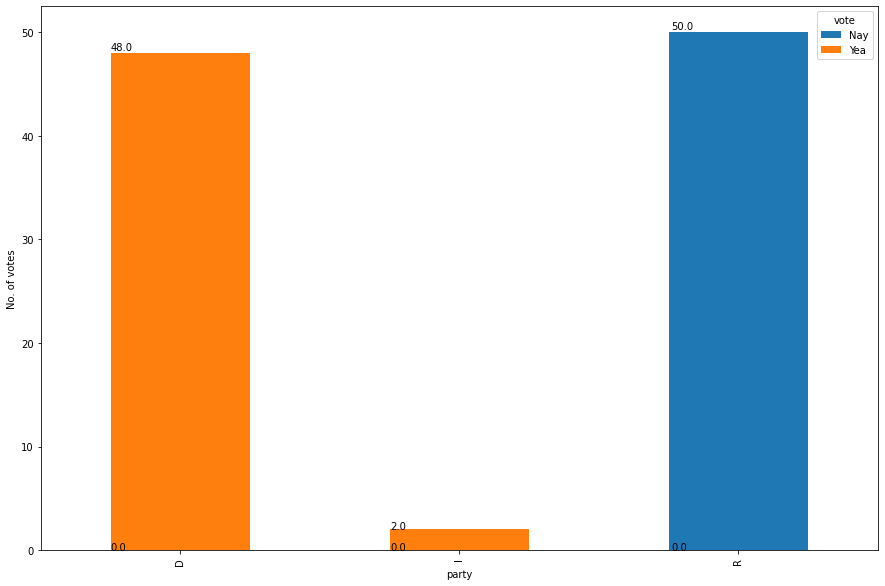

In [246]:
# df.groupby(['NFF', 'ABUSE']).size().unstack()
#       .plot(kind='bar', stacked=True, figsize=(15, 5))
party = df[['party', 'vote']]

# stacked_df = party[party.vote == 'Yea'].groupby(['party', 'vote'])['vote'].count().reset_index(name='Yea')
# # stacked_df.loc[len(stacked_df.index)] = ['D', 'Nay', 0]
# # stacked_df.loc[len(stacked_df.index)] = ['I', 'Nay', 0]
# # stacked_df.loc[len(stacked_df.index)] = ['R', 'Yea', 0]
# stacked_df
# party = party.value_counts().reset_index(name='Yea')
# party.at[0, 'Yea'] = 0

# party['Nay'] = [50, 0, 0]

party = party.groupby(['party', 'vote'])['party'].count().unstack('vote').fillna(0)
plt = party[['Nay','Yea']].plot(kind='bar', stacked=True, figsize=(15, 10))
plt.set_ylabel("No. of votes")
for p in plt.patches:
    plt.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

18. Pie chart of Republican votes ?

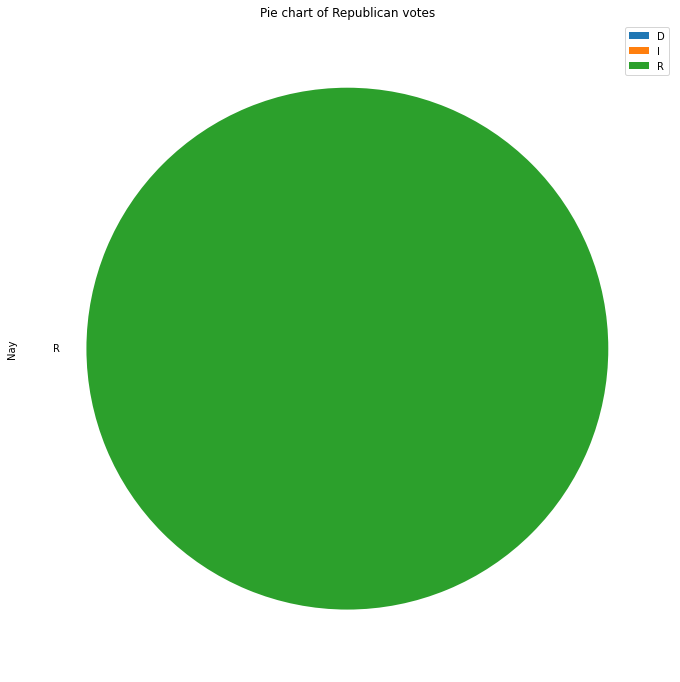

In [248]:
pieCha = party
pieCha.plot.pie(y='Nay', figsize= (12, 12), title= "Pie chart of Republican votes")


19. Plot the crosstab of Party and Yea/Nay as a heat map with the values

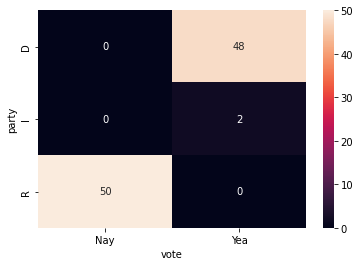

In [251]:
sns.heatmap(pieCha, annot=True)

20. Pie chart representing the number of states in which Democrats domination, Republican domination and Democrats, Republicans in equal ?

In [218]:
stateParty = df.groupby(['region', 'party'])['region'].count().reset_index(name='counts')
domination = {}

In [219]:
stateParty[stateParty.counts == 1]

,region,party,counts
20,ME,I,1
21,ME,R,1
26,MT,D,1
27,MT,R,1
36,OH,D,1
37,OH,R,1
40,PA,D,1
41,PA,R,1
49,VT,D,1
50,VT,I,1


In [220]:
domination['Republicans'] = len(stateParty[(stateParty['counts'] ==2) & (stateParty['party'] == 'R')]) + 1
domination['Democrates'] = len(stateParty[(stateParty.counts ==2) & (stateParty['party'] == 'D')]) + 1
domination['Equal'] = 1 + 1 + 1 + 1 + 1

domination

{'Democrates': 22, 'Equal': 5, 'Republicans': 23}

In [221]:
len(df['region'].unique())

50

In [227]:
domination_df = pd.DataFrame({'DominatingParty': domination.keys(), 'No_of_States':domination.values()}).set_index('DominatingParty')


In [228]:
domination_df

,No_of_States
DominatingParty,
Republicans,23
Democrates,22
Equal,5


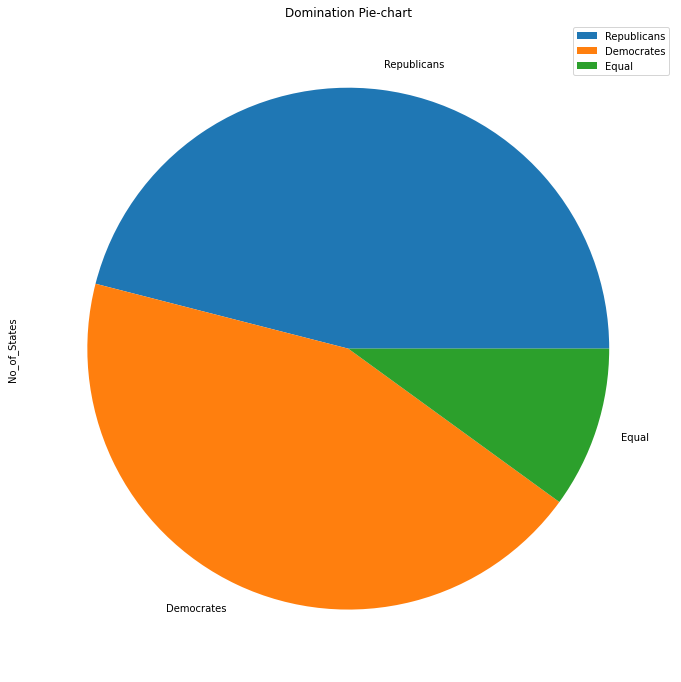

In [252]:
domination_df.plot.pie(y= 'No_of_States', figsize=(12,12), title= "Domination Pie-chart")